**Gordon Doore and Ghailan Fadah**

Fall 2023

CS 343: Neural Networks

Project 1: Single-layer networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.show()
plt.rcParams.update({'font.size': 18})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2


def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False, title='ADALINE'):
    n_epochs = len(loss_list)
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{title} ({n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()

**Paste in your code to load Old Faithful data with standardized features below**

In [3]:
faithful = pd.read_csv('data/old_faithful.csv')
X_pre = faithful[['eruptions','waiting']]
y = faithful[['severe']]
X_stand = (X_pre - X_pre.mean(axis = 0))/(X_pre.std(axis = 0))
X_stand = X_stand.to_numpy()


## Task 4: Neural network for regression

Given ADALINE's linear (identity) activation and sum-of-squares loss function, the learned weights can be used for more than just classification. In this task, you will use ADALINE to perform a linear regression (*the same neural network offers another interpretation of what you did in CS251!*).

### Goal

Your goal is to get an ADALINE network to predict `waiting` from `eruptions`. That is, you are setting up a simple (bivariate) linear regression with equation $$y_i = m \times x_i + b$$where the "x" variable (*predictor variable*) is `eruptions` and the "y" variable (*response variable*) is `waiting` (raw).

**Ultimately, you want to draw a regression line *through* the Old Faithful data clusters to *join* rather than divide them.**

### Design

You can do the regression with the exact network you have currently implemented. **You shouldn't make any code changes to your `Adaline` class.**  In the cell below, use your network to set up the regression by making appropriate design choices:
- Network input features: How many? What should they be?
- Weights: What do they mean in this problem context?
- What are the "classes"?

### Tips

- I suggest using the standardized version of the predictor (otherwise you may run into numeric stability issues), but it's fine to use the raw/unstandardized response variable. 
- Default hyperparameters should work well.
- You may need to add a singleton dimension after selecting your input predictor feature below so that your existing code works i.e. `shape=(272,1)`, NOT `shape=(272,)`

**Write your training code in the cell below.**

In [14]:
predictor_x = X_stand[:, 0].reshape(272,1)
response_y = X_stand[:,1]

ada = Adaline()
loss_list, acc_list = ada.fit(predictor_x, response_y)


In the cell below, **create a scatter plot of the data and the overlayed regression line**. Have the x-axis map onto standardized `eruptions` and y-axis onto raw `waiting` values.

### Tips
- You will need to leverage the model linear equation to go from x values to predicted y values. $y_i = m \times x_i + b$
- Look at the class boundary plot code that you used for classification. You will need to generate linearly spaced x values before plotting your regression y values on your regression line. 

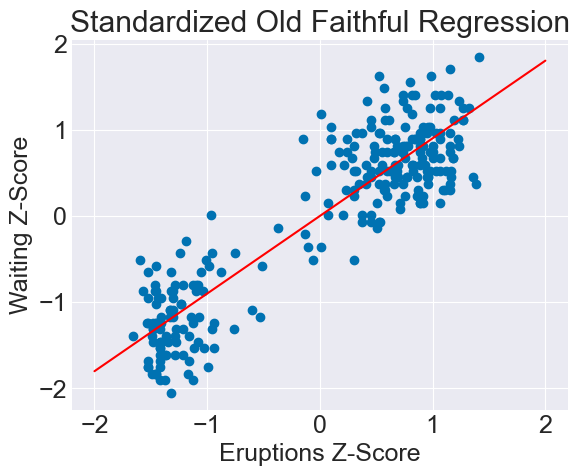

In [19]:
plt.scatter(predictor_x, response_y)

x = np.linspace(-2,2,200)
y = ada.get_wts()[0]*x+ada.get_bias()

plt.plot(x,y, c = "r", label = str(ada.get_wts()[0])+"X +"+str(ada.get_bias()))
plt.title("Standardized Old Faithful Regression")
plt.xlabel("Eruptions Z-Score")
plt.ylabel("Waiting Z-Score");

## Task 5: ADALINE and logistic regression

In this task, you will extend ADALINE to logistic regression, where we explicitly represent the probability of class membership.

For example data point $i$ is 80% likely to be in class A and 20% in class B.

**Remember:** Despite the name, logistic regression is actually about solving a **classification** problem. So this is more similar to Task 3 than Task 4.

### 5a. Implement logistic regression

Create a subclass of `Adaline` called `AdalineLogistic` in a new file called `adaline_logistic.py`. **Only override existing methods as needed to make the following changes. DO NOT MODIFY `adaline.py` FOR ANY REASON!!**.

#### Design

1. Use the sigmoid activation function. $z = f(x) = \frac{1}{1+e^{-x}}$
2. Represent the output classes as 0 or +1. This should require a code change (activation values >=0.5 are classified as 1, otherwise class 0) and preprocessing of the old faithful data.
3. Use the cross-entropy loss function: $\sum_{i=1}^n \left [ -y_i Log(z_i) - (1-y_i)Log(1 - z_i) \right ] $
where $z_i$ is the activation to input sample $i$ and $y_i$ is the corresponding $i^{th}$ class label (0 or 1).


#### Todo below:

1. Train your network using the standardized Old Faithful data. Default hyperparameters should work fine.
2. Plot your loss and accuracy as a function of epoch.
3. Plot the logistic regression decision boundary and the data (Use your code from Task 2).

#### Questions

**Question 10.** Why do we need to relabel the classes from -1/+1 to 0/1 when training a logistic regression network?

**Answer 10:** 

In [20]:
from adaline_logistic import AdalineLogistic

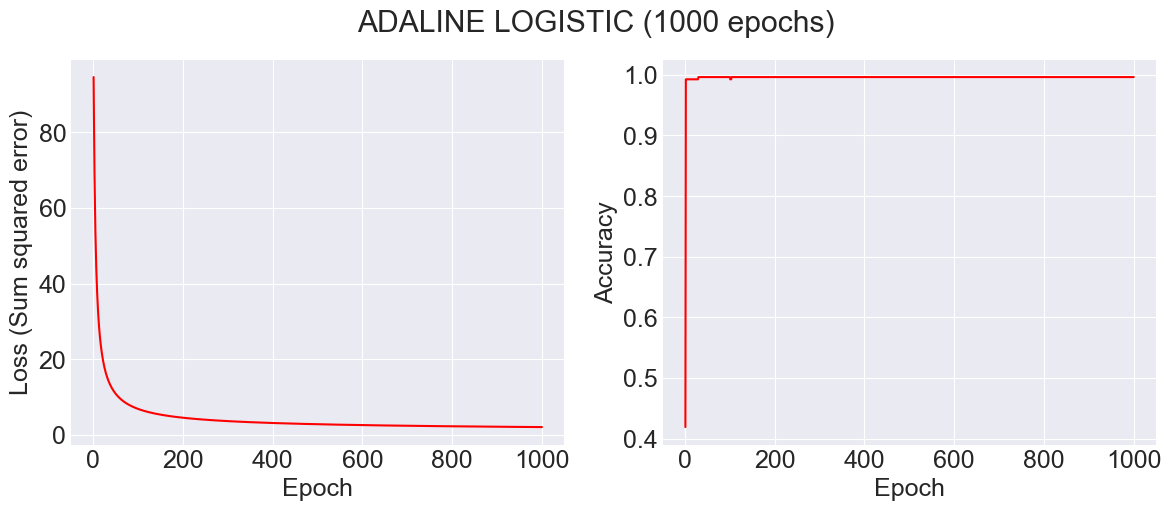

In [27]:
#relabel classes
y = faithful[['severe']].to_numpy()

y_relabel = np.where(y == -1, 0, 1)

#define net
ada_log = AdalineLogistic()
loss_list, acc_list = ada_log.fit(X_stand, np.squeeze(y_relabel))

#plot stuff
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False, title='ADALINE LOGISTIC'):
    n_epochs = len(loss_list)
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{title} ({n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()

plot_adaline_train(ada_log, loss_list, acc_list)

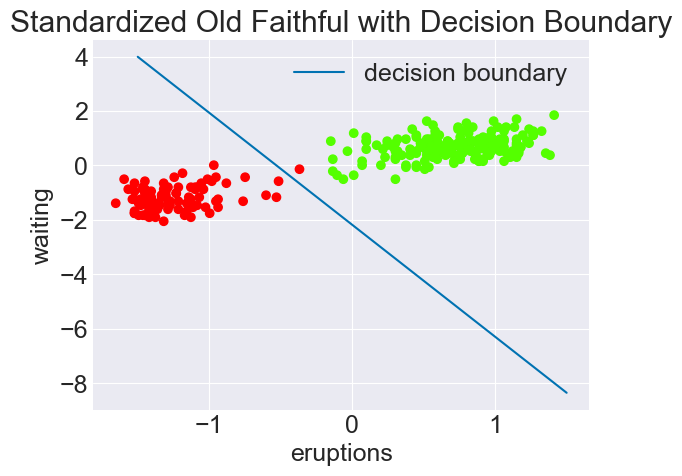

In [28]:
#plot logistic regression decision boundary

wts = ada_log.get_wts()
b = ada_log.get_bias()

x_i = np.linspace(-1.5,1.5, 200)
y_i = -wts[0]*x_i-b

plt.plot(x_i,y_i, label = "decision boundary")
plt.scatter(X_stand[:,0], X_stand[:,1], c = y_relabel, cmap = 'prism')
plt.title("Standardized Old Faithful with Decision Boundary")
plt.xlabel("eruptions")
plt.ylabel("waiting")
plt.legend();

### 5b. Test point probabilities

#### Questions

**Question 11.** (a) Determine the probability that the following test points belong to **both classes**:

Format: standardized (eruptions, waiting)
- (0.4, 0.98)
- (0.5, -2)
- (-1, 0.5)

(b) Interpret what your probabilities make sense in light of decision boundary plot you made in Task 5a.

**Answer 11:** 

# EXTENSION ONE: Additional Dataset#
Breast cancer accounts for 25% of all cancer cases and about 250,000 women and 2,100 men are diagnosed with it every year in the United States alone. Like most cancers it occurs when cells spiral out of control and develop tumors. These tumors can be observed via x-ray and other methods but one of the key challenges in combating breast cancer early is determing if a tumor is malignant (canerous) or begnign (non-canerous). In this extension we explored if our models that we built can help in combating this challenge and if so to what extent.  

In [50]:
# load data and pre-process
raw_data_cancer = pd.read_csv("data/breast-cancer.csv")

# -1 = malignant 1= begnign
y_cancer = raw_data_cancer["diagnosis"].map({'M': -1, 'B': 1}).to_numpy()
x_can = raw_data_cancer.drop(["diagnosis", "id"], axis =1).to_numpy()
x_can_stand = (x_can - x_can.mean(axis = 0))/(x_can.std(axis = 0))

In [69]:
from adaline import Perceptron
from adaline_logistic import AdalineLogistic
ada_can = Adaline()
per_can = Perceptron()
adalog_can = AdalineLogistic()

loss_can_ada, acc_can_ada = ada_can.fit(x_can_stand, y_cancer, 50, .0001)
loss_can_per, acc_can_per = per_can.fit(x_can_stand, y_cancer, 50, .0001)
loss_can_adalog, acc_can_adalog = adalog_can.fit(x_can_stand, y_cancer, 50, .0001)


In [70]:
print(acc_can_ada[49], acc_can_per[49], acc_can_adalog[49])

0.9630931458699473 0.9806678383128296 0.5869947275922671


As seen from above the best model by far is the perceptron model with a great accuracy of 98.6. This is very impersive given the fact that we only made a minor change to our activation function from the adaline model and it results in a dramatic shift in accuracy going from a poor 37.2 to 98.6.

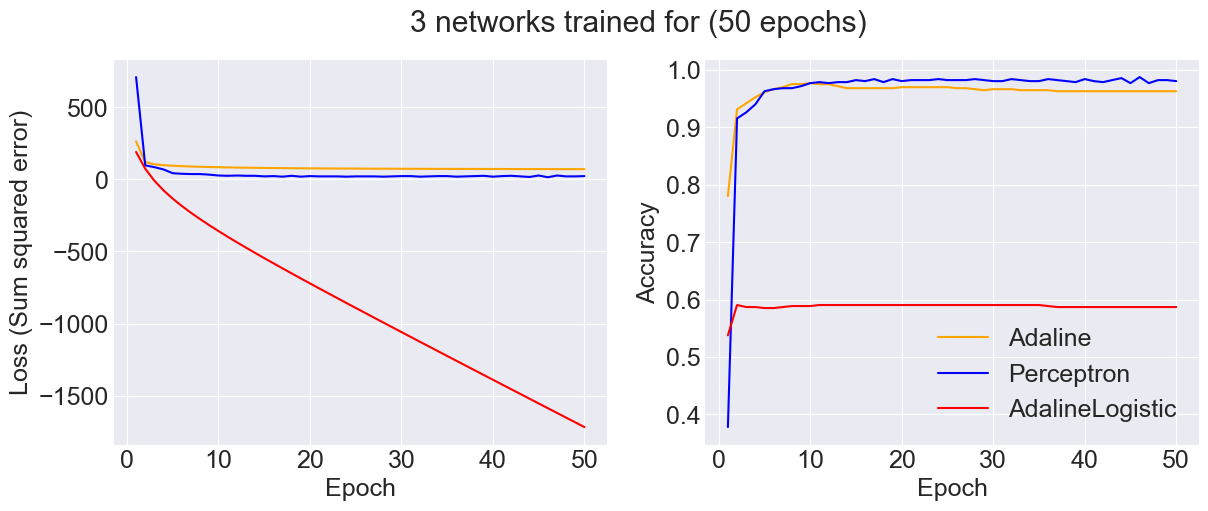

In [72]:
def plot_nets_train(loss_lists, acc_lists, net_names, plotMarkers=False):
    
    

    '''Creates a 1x2 grid of plots showing loss over epochs (left column) and
    accuracy over epochs (right column) for one or more network (num_nets in total).
    Generalizes `plot_adaline_train` for multiple trained networks.
    
    For example, in the case of two networks (e.g. adaline and perceptron; num_nets=2),
    there would be two curves in each of the two plots.
    
    Put differently, the following function call would produce the same pair of plots you've
    been getting up until this point with a single adaline network:
        plot_adaline_train(loss_lists[0], acc_lists[0])
    
    Parameters:
    -----------
    loss_lists: Python lists of ndarrays. len(loss_lists) = num_nets. len(loss_lists[0]) = n_epochs.
        This would be a list of the loss histories for each of the nets being plotted.
    acc_lists: Python lists of ndarrays. len(acc_lists) = num_nets. len(acc_lists[0]) = n_epochs.
        This would be a list of the accuracy histories for each of the nets being plotted.
    net_names: Python list of str. len(net_names) = num_nets.
        Identifying names of each net (e.g. for legend).
    plotMarkers: boolean.
        Should we draw a plot marker at each epoch on each curve?
    '''
    n_nets = len(net_names)
    n_epochs = len(loss_lists[0])
    
    colors = ['orange', 'blue', 'red']
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{n_nets} networks trained for ({n_epochs} epochs)')
    
    for loss_list, acc_list, color in zip(loss_lists, acc_lists, colors):
        x = np.arange(1, n_epochs+1)

        curveStr = '-'
        if plotMarkers:
            curveStr += 'o'

        ax1.plot(x, loss_list, curveStr, c=color)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss (Sum squared error)')
        ax2.plot(x, acc_list, curveStr, c=color)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
    
    plt.legend(net_names)
    plt.show()
    
plot_nets_train([loss_can_ada, loss_can_per, loss_can_adalog], [acc_can_ada, acc_can_per, acc_can_adalog], ["Adaline", "Perceptron", "AdalineLogistic"])

## Extensions

**NOTE:** Never integrate extensions into your base project so that it changes the expected behavior of core functions. If your extension changes the core design/behavior, no problem, duplicate your working base project and add features from there.

Generally, a small number of "in-depth" extensions count for more than many "shallow" extensions.

1. Extend the ADALINE model to multi-class classification using the One-Vs-Rest (OvR) method. Recall that with this scheme, we train multiple networks with each of the $C$ output classes serving as the +1 class (others set to -1 class). For example, for classes [a, b, c] would would train the networks with the following class labels: [1, -1, -1], [-1, 1, =1], [-1, -1, 1], respectively. We then classify based on the class that generates the highest max probability / activation value. Test it on a dataset with more than two classes (e.g. Iris). *You can adapt this to the logistic regression network, but note the necessary change in the coding of classes.*
2. Create plots of the ADALINE regression curve superimposed on the 2D data scatterplot after training on different numbers of epochs. One options is to plot all the curves in a single plot and establish a color scheme for time so that the viewer can visually discern the time sequence. Another possibility is to create a NxM grid of plots showing the progression (be sure to label the titles with #epochs).
3. Demonstrate how ADALINE can handle multiple linear regression.
4. Test the performance of single layer neural networks at classifying a binary class dataset of your choice.
5. Compare the performance of ADALINE, Perceptron, and Logistic Regression single-layer networks in additional ways and/or with additional datasets.
6. Research, implement, and analyze a neural network technique called early stopping. In essence, you stop training when the change in loss between successive epoches drops below some threshold. You can make your early stopping implementation fancier. For example, only stop if the change relative to the average loss over the most recent few epochs is less than the tolerance. Why could this be an improvement over the other method?